<a href="https://colab.research.google.com/github/CM-007/pythonCode_DS/blob/main/Forecasting_ACF_and_PACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autocorrelation**

In [44]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('/content/AirPassengers.csv',index_col='Month',parse_dates=True)
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


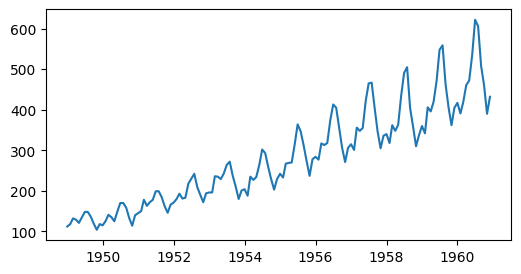

In [46]:
plt.figure(figsize=(6,3))
plt.plot(data)

#  Trend - linear upward , Seasonality - multiplicative

In [47]:
#  First-order diffrence : diff() - To convert non-stationary data to stationary
# 99% times your Time series data will be non-stationary in nature

data['Passengers_Diff'] = data['Passengers'].diff(periods=1)

In [48]:
data

,Passengers,Passengers_Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


### **Remove null values**

In [49]:
data = data.dropna()

In [50]:
data

,Passengers,Passengers_Diff
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


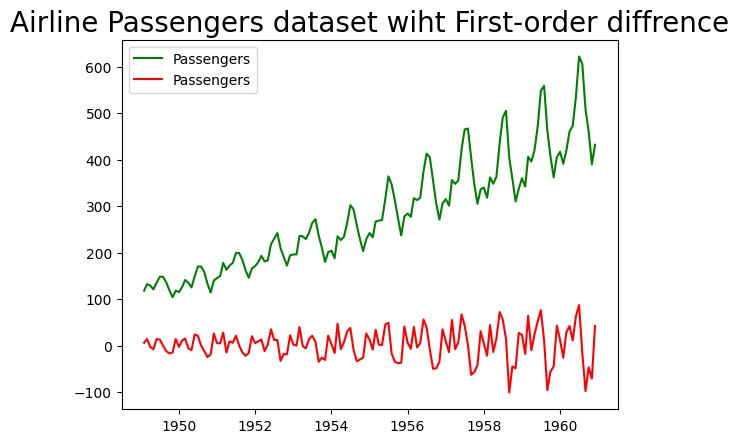

In [51]:
plt.title('Airline Passengers dataset wiht First-order diffrence',size=20)
plt.plot(data['Passengers'],label='Passengers',color='green')
plt.plot(data['Passengers_Diff'],label='Passengers',color='red')
plt.legend()

## **Calculate Autocorrelation**

### **ACF**

In [52]:
acf = acf(data['Passengers_Diff'])
np.round(acf,2)

array([ 1.  ,  0.3 , -0.1 , -0.24, -0.3 , -0.09, -0.08, -0.09, -0.29,
       -0.19, -0.1 ,  0.28,  0.83,  0.28, -0.11, -0.22, -0.23, -0.06,
       -0.07, -0.09, -0.3 , -0.16])

### **Plot ACF**

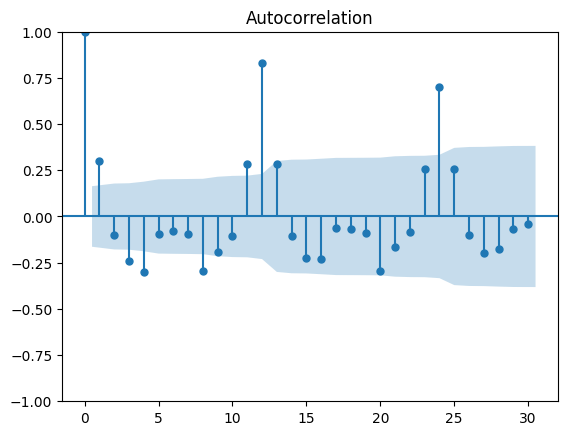

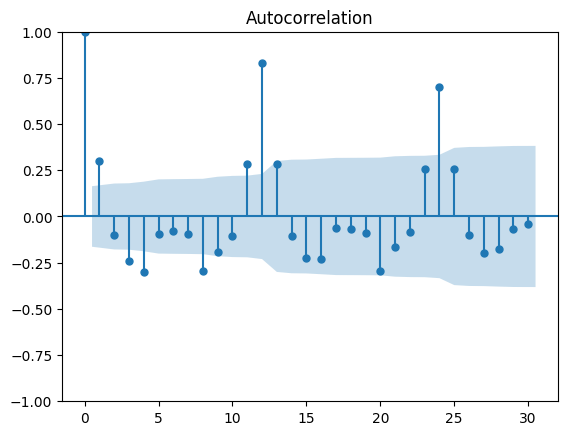

In [53]:
plot_acf(data['Passengers_Diff'],lags=30)

# **Calculate PACF**

In [54]:
pacf = pacf(data['Passengers_Diff'])
np.round(pacf,2)

array([ 1.  ,  0.3 , -0.22, -0.16, -0.23,  0.01, -0.2 , -0.16, -0.49,
       -0.28, -0.67, -0.42,  0.61, -0.05, -0.3 ,  0.02,  0.14,  0.09,
       -0.12,  0.01, -0.22, -0.12])

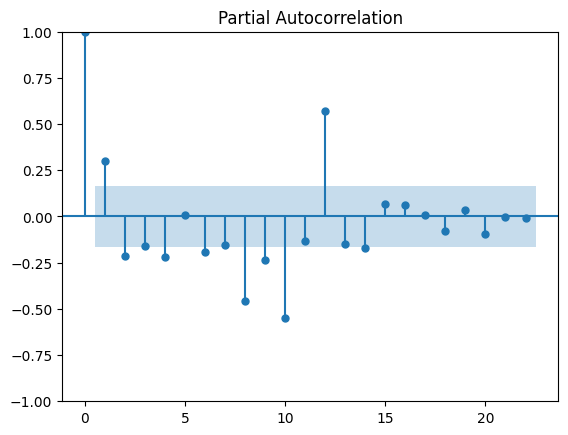

In [56]:
plot_pacf(data['Passengers_Diff']);